In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head(5)

,id,ideology,region,ethnic,gender
0,1,6,2,5,1
1,2,3,2,5,2
2,3,5,2,5,2
3,4,5,1,5,1
4,5,6,1,5,2


In [5]:
corr = data.corr()
corr

,id,ideology,region,gender
id,1.000000,-0.012757,0.022750,-0.084828
ideology,-0.012757,1.000000,0.044045,-0.048771
region,0.022750,0.044045,1.000000,-0.057242
gender,-0.084828,-0.048771,-0.057242,1.000000


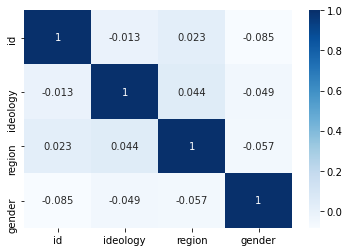

In [6]:
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

(array([  1.,  40.,  64., 146.,  53., 241., 143.,  88.,   5.,  59.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

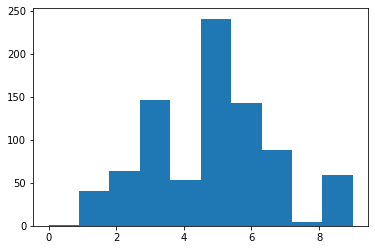

In [9]:
plt.hist(data["ideology"].values)

(array([155.,   0.,   0., 232.,   0.,   0., 283.,   0.,   0., 170.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

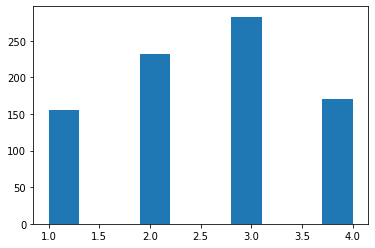

In [10]:
plt.hist(data["region"].values)

(array([698.,  57.,   0.,  43.,   0.,  24.,   3.,   0.,  11.,   4.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

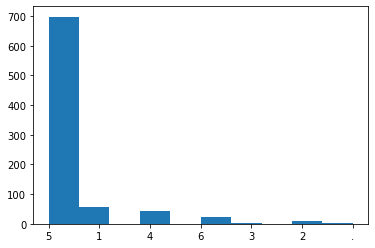

In [11]:
plt.hist(data["ethnic"].values)

(array([366.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 474.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

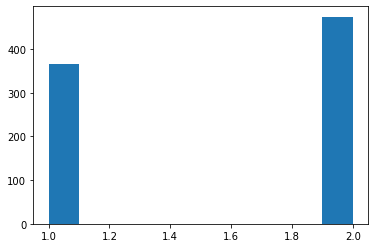

In [12]:
plt.hist(data["gender"].values)

In [13]:
male = data[data["gender"] == 1]
male

,id,ideology,region,ethnic,gender
0,1,6,2,5,1
3,4,5,1,5,1
5,6,1,1,1,1
6,7,4,1,5,1
11,16,7,4,4,1
...,...,...,...,...,...
824,1770,5,3,5,1
825,1772,3,2,5,1
827,1774,2,4,5,1
833,1795,3,1,5,1


In [14]:
female = data[data["gender"] == 2]
female

,id,ideology,region,ethnic,gender
1,2,3,2,5,2
2,3,5,2,5,2
4,5,6,1,5,2
7,8,3,1,5,2
8,10,2,2,5,2
...,...,...,...,...,...
834,1798,3,3,5,2
835,1800,3,3,5,2
837,1804,5,2,5,2
838,1807,5,3,1,2


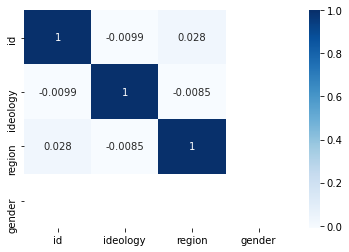

In [15]:
corr = male.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

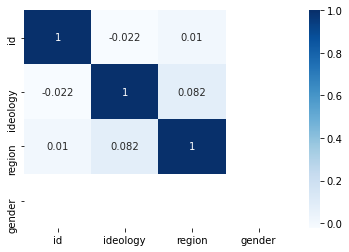

In [16]:
corr = female.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

In [17]:
data

,id,ideology,region,ethnic,gender
0,1,6,2,5,1
1,2,3,2,5,2
2,3,5,2,5,2
3,4,5,1,5,1
4,5,6,1,5,2
...,...,...,...,...,...
835,1800,3,3,5,2
836,1803,6,2,5,1
837,1804,5,2,5,2
838,1807,5,3,1,2


In [21]:
south_mid = data[(data["region"] == 3) | (data["region"] == 2)]
north = data[data["region"] == 1]

In [23]:
south_mid_length = len(south_mid["ideology"])
north_length = len(north["ideology"])

In [24]:
south_sizes = list()
north_sizes = list()
labels = list()
for i in set(data["ideology"].values):
    labels.append(str(i))
    south_size = len(south_mid[south_mid["ideology"] == i].values) / south_mid_length
    north_size = len(north[north["ideology"] == i].values) / north_length
    south_sizes.append(south_size)
    north_sizes.append(north_size)

In [25]:
labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [31]:
import numpy as np
explode = list(np.zeros(10))
explode

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

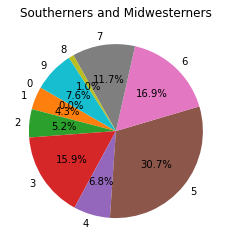

In [33]:
plt.pie(south_sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Southerners and Midwesterners")
plt.show() 

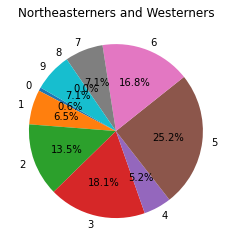

In [35]:
plt.pie(north_sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Northeasterners and Westerners")
plt.show() 

In [36]:
from  scipy.stats import chi2_contingency

In [68]:
a = data[data["gender"] == 1]["ideology"].values
b = data[data["gender"] == 2]["ideology"].values[:366]

In [69]:
kf_data = np.vstack((a, b))

In [45]:
kf_data = [, list()]
np.array(kf_data)

array([list([6, 5, 1, 4, 7, 3, 6, 6, 6, 2, 9, 5, 5, 2, 7, 3, 6, 5, 7, 2, 6, 6, 4, 3, 6, 4, 6, 9, 6, 9, 4, 6, 6, 2, 2, 5, 3, 2, 5, 9, 6, 5, 5, 3, 4, 6, 6, 7, 6, 7, 6, 1, 1, 9, 6, 6, 3, 5, 5, 3, 5, 6, 5, 3, 7, 2, 5, 6, 7, 7, 4, 3, 6, 3, 3, 5, 3, 6, 2, 5, 1, 6, 7, 6, 4, 4, 9, 6, 5, 5, 7, 6, 6, 2, 2, 9, 6, 6, 6, 6, 5, 3, 6, 7, 5, 5, 5, 1, 5, 5, 3, 3, 4, 3, 6, 1, 6, 7, 4, 5, 3, 3, 6, 5, 7, 5, 4, 5, 6, 7, 2, 7, 6, 5, 7, 7, 7, 5, 5, 3, 6, 5, 7, 6, 9, 3, 5, 5, 3, 9, 5, 3, 3, 6, 7, 6, 2, 7, 2, 7, 6, 9, 9, 5, 7, 5, 5, 5, 5, 1, 7, 5, 9, 5, 3, 9, 1, 3, 7, 6, 3, 5, 9, 5, 6, 5, 1, 5, 6, 1, 3, 3, 3, 3, 6, 5, 5, 1, 1, 6, 2, 6, 6, 2, 3, 5, 2, 5, 5, 3, 3, 6, 5, 5, 6, 5, 7, 4, 7, 5, 3, 2, 3, 5, 6, 2, 5, 5, 4, 9, 5, 2, 5, 5, 6, 1, 6, 5, 5, 6, 6, 5, 5, 9, 5, 7, 5, 6, 5, 3, 5, 6, 6, 4, 7, 6, 3, 1, 5, 6, 4, 2, 5, 3, 9, 3, 7, 1, 5, 6, 5, 7, 2, 5, 9, 5, 6, 2, 5, 7, 3, 7, 5, 4, 7, 2, 8, 6, 5, 4, 4, 6, 7, 9, 5, 4, 6, 2, 6, 6, 6, 1, 5, 5, 7, 5, 6, 3, 7, 1, 6, 9, 5, 5, 5, 9, 5, 6, 5, 7, 6, 7, 3, 2, 5, 4, 9, 1, 5, 

In [42]:
kf_data = np.array([[11.7,8.7,15.4,8.4], [18.1,11.7,24.3,13.6],
              [26.9,20.3,37,19.3],[41,30.9,54.6,35.1],
              [66,54.3,71.1,50]])

In [70]:
kf = chi2_contingency(kf_data)

In [71]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=292.1525, p-value=0.9980, df=365 expected_frep=[[4.59245708 5.10273009 3.57191106 3.57191106 4.59245708 3.06163805
  5.10273009 7.65409513 6.63354911 3.57191106 7.14382212 4.08218407
  3.06163805 4.08218407 4.08218407 4.08218407 5.6130031  5.10273009
  6.1232761  2.55136504 5.6130031  7.65409513 5.6130031  3.06163805
  4.59245708 2.55136504 5.10273009 7.14382212 3.57191106 7.14382212
  4.59245708 5.6130031  5.6130031  4.59245708 3.57191106 5.6130031
  4.08218407 4.08218407 5.10273009 7.14382212 4.08218407 7.14382212
  6.63354911 4.08218407 4.08218407 5.10273009 5.6130031  8.16436814
  6.1232761  8.16436814 4.59245708 3.06163805 4.08218407 6.1232761
  5.6130031  7.65409513 3.06163805 5.10273009 3.06163805 2.55136504
  7.14382212 5.6130031  5.6130031  4.59245708 7.14382212 3.06163805
  7.14382212 5.6130031  7.14382212 5.10273009 6.63354911 4.59245708
  5.6130031  4.59245708 4.59245708 4.59245708 3.57191106 5.6130031
  2.04109203 5.10273009 3.57191106 6.1232761  5.10273009

In [74]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [75]:
def chi2_independence(alpha, data):
    g, p, dof, expctd = chi2_contingency(data)
    if dof == 0:
        print('自由度应该大于等于1')
    elif dof == 1:
        cv = chi2.isf(alpha * 0.5, dof)
    else:
        cv = chi2.isf(alpha * 0.5, dof-1)

    if g > cv:
        re = 1  # 表示拒绝原假设
    else:
        re = 0  # 表示接受原假设
    return g, p, dof, re, expctd

In [76]:
chi2_independence(0.05, kf_data)

(292.1524654677549,
 0.9979783813559069,
 365,
 0,
 array([[4.59245708, 5.10273009, 3.57191106, 3.57191106, 4.59245708,
         3.06163805, 5.10273009, 7.65409513, 6.63354911, 3.57191106,
         7.14382212, 4.08218407, 3.06163805, 4.08218407, 4.08218407,
         4.08218407, 5.6130031 , 5.10273009, 6.1232761 , 2.55136504,
         5.6130031 , 7.65409513, 5.6130031 , 3.06163805, 4.59245708,
         2.55136504, 5.10273009, 7.14382212, 3.57191106, 7.14382212,
         4.59245708, 5.6130031 , 5.6130031 , 4.59245708, 3.57191106,
         5.6130031 , 4.08218407, 4.08218407, 5.10273009, 7.14382212,
         4.08218407, 7.14382212, 6.63354911, 4.08218407, 4.08218407,
         5.10273009, 5.6130031 , 8.16436814, 6.1232761 , 8.16436814,
         4.59245708, 3.06163805, 4.08218407, 6.1232761 , 5.6130031 ,
         7.65409513, 3.06163805, 5.10273009, 3.06163805, 2.55136504,
         7.14382212, 5.6130031 , 5.6130031 , 4.59245708, 7.14382212,
         3.06163805, 7.14382212, 5.6130031 , 7.14382